In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [2]:
#columns name for easy access
common_header = ["YYYY","DOY","HR","MN"]
headers =  ["Timeshift","Speed(km/s)","Proton Density(n/cc)","Temperature(K)","FlowPressure(nPa)"]

#graph_label for headers(short)
graph_header = ["TimeShift","Speed","Density","Tempt","Pressure"]

common_header.extend(headers)
solar_data = pd.read_csv("omni_min_d6LLjMNUDP.lst",sep= '\s+', names = common_header)

In [3]:
#to remove the outliers 
#this takes the highest value(999,9999,999999) outliers from the series so before using this we should be sure our all column
# have outliers and then later remove the column not having outliers from list headers
for itm in headers:
    solar_data.replace(to_replace = solar_data[itm].max(),value = np.NaN,inplace = True)
#     solar_data.fillna(method='bfill',inplace = True)

In [4]:
#for combining the YYYY,DOY,HR,MM to a datetime type for easy ploting
import datetime
time_date = []
for i in range(len(solar_data.index)):
    time_date.append(pd.to_datetime(f"{int(solar_data.iloc[i].YYYY)}{int(solar_data.iloc[i].DOY)}{int(solar_data.iloc[i].HR)}{int(solar_data.iloc[i].MN)}",format='%Y%j%H%M'))
solar_data.loc[:,'time_date'] = time_date #add new column time_date to our df

In [5]:
solar_data

,YYYY,DOY,HR,MN,Timeshift,Speed(km/s),Proton Density(n/cc),Temperature(K),FlowPressure(nPa),time_date
0,2004,208,0,0,2216.0,689.4,2.68,38628.0,2.55,2004-07-26 00:00:00
1,2004,208,0,1,2254.0,NaN,NaN,NaN,NaN,2004-07-26 00:01:00
2,2004,208,0,2,2291.0,NaN,NaN,NaN,NaN,2004-07-26 00:02:00
3,2004,208,0,3,2323.0,685.4,2.63,39372.0,2.47,2004-07-26 00:03:00
4,2004,208,0,4,2362.0,685.4,2.63,39372.0,2.47,2004-07-26 00:04:00
...,...,...,...,...,...,...,...,...,...,...
2875,2004,209,23,55,1482.0,NaN,NaN,NaN,NaN,2004-07-27 23:55:00
2876,2004,209,23,56,1381.0,870.0,0.55,409684.0,0.83,2004-07-27 23:56:00
2877,2004,209,23,57,1539.0,896.3,0.60,553925.0,0.96,2004-07-27 23:57:00
2878,2004,209,23,58,1486.0,914.1,0.63,651854.0,1.05,2004-07-27 23:58:00


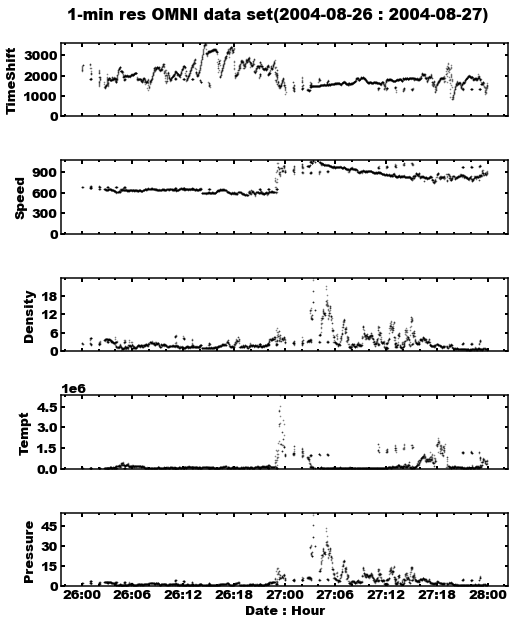

In [36]:
plt.rcParams.update({'font.family':'Arial Black',"figure.facecolor":'white',"font.size":13})

fig,ax = plt.subplots(len(headers),1,figsize=(8,12),sharex = True)
fig.suptitle("1-min res OMNI data set(2004-08-26 : 2004-08-27)",y = 0.93)

fig.set_figheight(10)
fig.subplots_adjust(hspace=0.6)
#for formatting the x labels to take day and hour
myFmt = mdates.DateFormatter('%d:%H')

for i,item in enumerate(headers):
    [x.set_linewidth(1.5) for x in ax[i].spines.values()]
#     ax[i].plot(solar_data[time_date"],solar_data[item])
    ax[i].scatter(solar_data["time_date"],solar_data[item],s = 0.5, alpha = 0.4,color = 'black')
    
    #setting y limit to equals 0 to max value and label of it to equal the argument passed from graph_header
    ax[i].set_ylim([0,solar_data[item].max()])
    ax[i].set_ylabel(f"{graph_header[i]}")
    
    #setting the y axis 4 major locator to have ticks in the pos and 3 minor locator
    ax[i].yaxis.set_major_locator(plt.MaxNLocator(4))
    ax[i].xaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    ax[i].tick_params(left = True, right = True, bottom = True, top = True, direction = "in",which = "both",width = 2)
    
    if (item == headers[-1]):
        #to have labels in x-axis in format %d-%H
        ax[i].xaxis.set_major_formatter(myFmt)
        ax[i].set_xlabel("Date : Hour")
        
plt.savefig('final.jpg', bbox_inches='tight')